In [24]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Load data

Load in the data and handle multiple rows for the same day in speeches.csv the same way in the R solution:

In [25]:
import pandas as pd

# load in the data, note your paths to the data may be different from what are showing here
fx = pd.read_csv("fx.csv", skiprows=4, na_values=['-'])
fx.columns = ["date", "exchange_rate"]
fx.dropna(inplace=True)

speeches = pd.read_csv("speeches.csv", sep='|', usecols=['date', 'contents'])
speeches.dropna(inplace=True)


In [26]:
fx.isna().sum()

date             0
exchange_rate    0
dtype: int64

In [27]:
fx.shape

(5857, 2)

In [28]:
speeches.shape

(2492, 2)

In [29]:
from collections import Counter
Counter(speeches.date)

Counter({'2019-03-27': 5,
         '2018-05-14': 5,
         '2018-03-14': 5,
         '2006-05-05': 5,
         '2021-01-25': 4,
         '2020-02-27': 4,
         '2017-09-22': 4,
         '2017-05-18': 4,
         '2017-04-06': 4,
         '2014-11-17': 4,
         '2011-06-10': 4,
         '2010-09-29': 4,
         '2010-09-27': 4,
         '2010-07-09': 4,
         '2009-09-04': 4,
         '2008-09-05': 4,
         '2008-05-15': 4,
         '2007-11-26': 4,
         '2007-01-15': 4,
         '2005-10-28': 4,
         '2003-06-12': 4,
         '2001-08-30': 4,
         '1999-11-19': 4,
         '2020-11-04': 3,
         '2020-09-28': 3,
         '2020-02-11': 3,
         '2019-05-10': 3,
         '2018-11-26': 3,
         '2018-11-13': 3,
         '2018-02-15': 3,
         '2018-01-29': 3,
         '2017-10-13': 3,
         '2017-09-25': 3,
         '2017-04-04': 3,
         '2017-02-02': 3,
         '2016-11-14': 3,
         '2016-09-26': 3,
         '2016-04-25': 3,
         '20

In [30]:
speeches['contents'][0]

'   SPEECH  Overcoming the tragedy of the horizon: requiring banks to translate 2050 targets into milestones   Keynote speech by Frank Elderson, Member of the Executive Board of the ECB and Vice-Chair of the Supervisory Board of the ECB, at the Financial Market Authority’s Supervisory Conference Vienna, 20 October 2021 Introduction It is a great pleasure for me to speak here and I would like to thank the organisers for inviting me.  Today, I want to look ahead – to next year, to the next five years and to the three decades up to 2050, the year by which the EU has pledged to become carbon neutral under the Paris Agreement. Thirty years is a hair’s breadth of time: merely one-hundred-and-fifty-millionth of the earth’s 4.5 billion years of existence. A brief span indeed.  There is no doubt that time is running out for us to tackle the climate and environmental crises. What does this mean for banks? This means that the time for preparations is over and the time for action is now. Banks nee

In [31]:
'apple' + ' orange'

'apple orange'

In [32]:
speeches.groupby("date").sum()

,contents
date,
1997-02-07,Conference organised by the Hungarian Bankin...
1997-03-10,Securing the benefits of EMU Address by Al...
1997-04-22,Convergence and the role of the European Cen...
1997-04-30,The operation of monetary policy in stage th...
1997-05-13,The European Central Bank: independent and a...
...,...
2021-10-12,SPEECH The contribution of finance to comb...
2021-10-14,SPEECH IMFC Statement Statement by Chri...
2021-10-16,SPEECH Globalisation after the pandemic ...


In [33]:
speeches.groupby("date")['contents'].apply(lambda x: " ".join(x.astype(str)))

date
1997-02-07      Conference organised by the Hungarian Bankin...
1997-03-10      Securing the benefits of EMU   Address by Al...
1997-04-22      Convergence and the role of the European Cen...
1997-04-30      The operation of monetary policy in stage th...
1997-05-13      The European Central Bank: independent and a...
                                    ...                        
2021-10-12       SPEECH  The contribution of finance to comb...
2021-10-14       SPEECH  IMFC Statement    Statement by Chri...
2021-10-16       SPEECH  Globalisation after the pandemic   ...
2021-10-19       SPEECH  “Hic sunt leones” – open research q...
2021-10-20       SPEECH  Overcoming the tragedy of the horiz...
Name: contents, Length: 1912, dtype: object

In [34]:
speeches = speeches.groupby("date")['contents'].apply(lambda x: " ".join(x.astype(str))).reset_index()
speeches.shape

(1912, 2)

In [35]:
speeches

,date,contents
0,1997-02-07,Conference organised by the Hungarian Bankin...
1,1997-03-10,Securing the benefits of EMU Address by Al...
2,1997-04-22,Convergence and the role of the European Cen...
3,1997-04-30,The operation of monetary policy in stage th...
4,1997-05-13,The European Central Bank: independent and a...
...,...,...
1907,2021-10-12,SPEECH The contribution of finance to comb...
1908,2021-10-14,SPEECH IMFC Statement Statement by Chri...
1909,2021-10-16,SPEECH Globalisation after the pandemic ...
1910,2021-10-19,SPEECH “Hic sunt leones” – open research q...


In [36]:
fx

,date,exchange_rate
0,2021-11-16,1.1368
1,2021-11-15,1.1444
2,2021-11-12,1.1448
3,2021-11-11,1.1460
4,2021-11-10,1.1558
...,...,...
5914,1999-01-08,1.1659
5915,1999-01-07,1.1632
5916,1999-01-06,1.1743
5917,1999-01-05,1.1790


In [37]:
pd.merge(fx, speeches, on ='date').isna().sum()

date             0
exchange_rate    0
contents         0
dtype: int64

In [38]:
fx.shape

(5857, 2)

In [39]:
pd.merge(fx, speeches, on ='date')

,date,exchange_rate,contents
0,2021-10-20,1.1623,SPEECH Overcoming the tragedy of the horiz...
1,2021-10-19,1.1655,SPEECH “Hic sunt leones” – open research q...
2,2021-10-14,1.1602,SPEECH IMFC Statement Statement by Chri...
3,2021-10-12,1.1555,SPEECH The contribution of finance to comb...
4,2021-10-11,1.1574,SPEECH The monetary policy toolbox and the...
...,...,...,...
1745,1999-01-28,1.1410,The euro - four weeks after the start Prof...
1746,1999-01-25,1.1584,Finnish savers and investors in the euro are...
1747,1999-01-18,1.1612,Hearing at the European Parliament's Sub-Com...
1748,1999-01-15,1.1626,European economic and monetary union - lates...


In [40]:
df = pd.merge(fx, speeches, on ='date', how = 'left')

In [41]:
df

,date,exchange_rate,contents
0,2021-11-16,1.1368,NaN
1,2021-11-15,1.1444,NaN
2,2021-11-12,1.1448,NaN
3,2021-11-11,1.1460,NaN
4,2021-11-10,1.1558,NaN
...,...,...,...
5852,1999-01-08,1.1659,NaN
5853,1999-01-07,1.1632,NaN
5854,1999-01-06,1.1743,NaN
5855,1999-01-05,1.1790,NaN


In [42]:
df.dtypes

date              object
exchange_rate    float64
contents          object
dtype: object

In [43]:
df['date'] = pd.to_datetime(df['date'])

In [44]:
df.dtypes

date             datetime64[ns]
exchange_rate           float64
contents                 object
dtype: object

In [45]:
df.set_index('date', inplace= True)

In [46]:
df

,exchange_rate,contents
date,,
2021-11-16,1.1368,NaN
2021-11-15,1.1444,NaN
2021-11-12,1.1448,NaN
2021-11-11,1.1460,NaN
2021-11-10,1.1558,NaN
...,...,...
1999-01-08,1.1659,NaN
1999-01-07,1.1632,NaN
1999-01-06,1.1743,NaN


In [47]:
df.dtypes

exchange_rate    float64
contents          object
dtype: object

## Remove entries with obvious outliers or mistakes

We first see if there is any obvious outliers or mistakes by plotting the data:

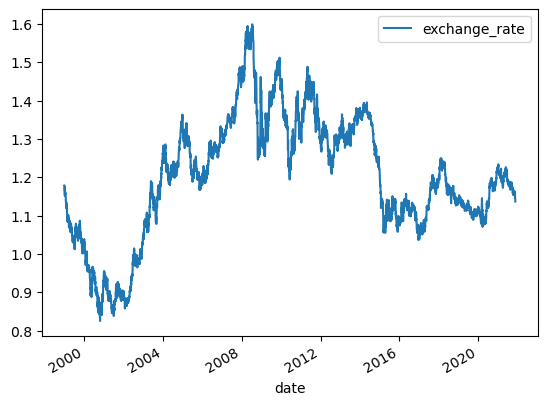

In [48]:
df.plot();

And look at the summary statistics:

In [49]:
df.describe()

,exchange_rate
count,5857.000000
mean,1.199326
std,0.159310
min,0.825200
25%,1.102500
50%,1.199000
75%,1.316900
max,1.599000


The data does not seem to have obvious outliers or mistakes. 

## 3.	Handle missing observations

We can see that there are some missing data:

In [50]:
df.isna().sum()

exchange_rate       0
contents         4107
dtype: int64

Here we fill in the exchange rate with the latest information available:

In [51]:
df.exchange_rate.fillna(method='bfill', inplace=True)

We can see there is no more missing data for exchange rate:

In [52]:
df.isna().sum()

exchange_rate       0
contents         4107
dtype: int64


## 4. Exchange rate return

Get the return by using the formula: $R_{t} = \frac{P_{t}-P_{t-1}}{P_{t-1}}$

Extend the original dataset with the following variables: “good_news” (equal to 1 when the exchange rate return is larger than 0.5 percent, 0 otherwise) and “bad_news” (equal to 1 when the exchange rate return is lower than -0.5 percent, 0 otherwise).

In [53]:
df['return'] = df.exchange_rate.diff(-1)/df.exchange_rate

In [54]:
df

,exchange_rate,contents,return
date,,,
2021-11-16,1.1368,NaN,-0.006685
2021-11-15,1.1444,NaN,-0.000350
2021-11-12,1.1448,NaN,-0.001048
2021-11-11,1.1460,NaN,-0.008551
2021-11-10,1.1558,NaN,-0.001644
...,...,...,...
1999-01-08,1.1659,NaN,0.002316
1999-01-07,1.1632,NaN,-0.009543
1999-01-06,1.1743,NaN,-0.004002


In [55]:
(df['return'] > 0.005).astype(int)

date
2021-11-16    0
2021-11-15    0
2021-11-12    0
2021-11-11    0
2021-11-10    0
             ..
1999-01-08    0
1999-01-07    0
1999-01-06    0
1999-01-05    0
1999-01-04    0
Name: return, Length: 5857, dtype: int64

In [56]:
0.5/100

0.005

In [57]:
(df['return'] > 0.5/100).astype(int)

date
2021-11-16    0
2021-11-15    0
2021-11-12    0
2021-11-11    0
2021-11-10    0
             ..
1999-01-08    0
1999-01-07    0
1999-01-06    0
1999-01-05    0
1999-01-04    0
Name: return, Length: 5857, dtype: int64

Extend the dataset with the variables "good_news" and "bad_news":

In [58]:
df['good_news'] = (df['return'] > 0.5/100).astype(int)
df['bad_news'] = (df['return'] < -0.5/100).astype(int)

In [59]:
df['good_news'] = df['return'].apply(lambda x: 1 if x > 0.005 else 0)
df['bad_news'] = df['return'].apply(lambda x: 1 if x < -0.005 else 0)

In [60]:
df.describe()

,exchange_rate,return,good_news,bad_news
count,5857.000000,5856.000000,5857.000000,5857.000000
mean,1.199326,-0.000024,0.168175,0.170053
std,0.159310,0.005993,0.374053,0.375711
min,0.825200,-0.048494,0.000000,0.000000
25%,1.102500,-0.003284,0.000000,0.000000
50%,1.199000,0.000000,0.000000,0.000000
75%,1.316900,0.003286,0.000000,0.000000
max,1.599000,0.041170,1.000000,1.000000


## 5. Associate words with `good_news`, `bad_news`

Get the contents that associate with `good_news` and `bad_news`:

In [61]:
# remove rows with NA 
df.dropna(inplace=True)
df.head()

,exchange_rate,contents,return,good_news,bad_news
date,,,,,
2021-10-20,1.1623,SPEECH Overcoming the tragedy of the horiz...,-0.002753,0,0
2021-10-19,1.1655,SPEECH “Hic sunt leones” – open research q...,0.004376,0,0
2021-10-14,1.1602,SPEECH IMFC Statement Statement by Chri...,0.003448,0,0
2021-10-12,1.1555,SPEECH The contribution of finance to comb...,-0.001644,0,0
2021-10-11,1.1574,SPEECH The monetary policy toolbox and the...,0.000432,0,0


In [62]:
df.isna().sum()

exchange_rate    0
contents         0
return           0
good_news        0
bad_news         0
dtype: int64

In [63]:
df.shape

(1750, 5)

In [64]:
# get the contents related to "good_news" and "bad_news"
good_news_contents = df.contents[df.good_news==1].str.cat(sep=' ')
bad_news_contents = df.contents[df.bad_news==1].str.cat(sep=' ')

Load in some stop words, which are words that used to form a sentence but does not add much meaning to a sentence. Example of stop words are "a", "the" "does", "i", etc. 

In [65]:
stop_words = set(pd.read_csv("stopwords.txt", header=None).iloc[:,0].tolist())

In [66]:
len(stop_words)

423

The function below helps us to get the most common words (excluding stop_words) related to `good_news` and `bad_news`. Please read the comments to understand how it works:

In [67]:
import string
import collections

def get_word_freq(contents, stop_words, num_words):
    freq = dict()
    
    
    for word in contents.split():
        word = word.strip(string.punctuation+'–')
        word = word.lower()
        if word not in stop_words and len(word):
            if word in freq:
                freq[word] += 1
            else:
                freq[word] = 1
                
                
    freq = dict(sorted(freq.items(), key = lambda item: -item[1]))
    return list(freq.keys())[:num_words]


Use the function above to get the 20 most common words associated with `good_news` and `bad_news`

In [68]:
good_indicators = get_word_freq(good_news_contents, stop_words, num_words = 20)
bad_indicators = get_word_freq(bad_news_contents, stop_words, num_words = 20)

In [69]:
good_indicators

['euro',
 'financial',
 'policy',
 'monetary',
 'de',
 'economic',
 'market',
 'central',
 'stability',
 'ecb',
 'banks',
 'inflation',
 'european',
 'der',
 'die',
 'price',
 'growth',
 'countries',
 'la',
 'markets']

In [70]:
bad_indicators

['euro',
 'financial',
 'policy',
 'monetary',
 'market',
 'de',
 'central',
 'economic',
 'banks',
 'stability',
 'european',
 'ecb',
 'growth',
 'price',
 'inflation',
 'la',
 'bank',
 'markets',
 'countries',
 'risk']

Note that many terms appear in both, and the results are not the same as R. It may because the `word_tokenizer()` in R may not work the same way as `split()` with `strip()`.